In [112]:
import matplotlib.pyplot as plt
import skimage
import os
from PIL import Image
import numpy as np

In [113]:
data_dir = '../data'  

jellyfish_dict = {}

for class_name in os.listdir(data_dir):
    if class_name=='Train_Test_Valid':
        continue
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = []
        for filename in os.listdir(class_path):
            file_path = os.path.join(class_path, filename)
            try:
                img = Image.open(file_path).convert('RGB') 
                img_array = np.array(img) 
                images.append(img_array)
            except Exception as e:
                print(f"Błąd przy wczytywaniu {file_path}: {e}")
        jellyfish_dict[class_name] = images
print("Liczba zdjęć poszczególnych gatunków meduz:")
for label, imgs in jellyfish_dict.items():
    print(f"{label}: {len(imgs)} images")


Liczba zdjęć poszczególnych gatunków meduz:
barrel_jellyfish: 150 images
blue_jellyfish: 150 images
compass_jellyfish: 150 images
lions_mane_jellyfish: 150 images
mauve_stinger_jellyfish: 150 images
Moon_jellyfish: 150 images


In [114]:
from collections import Counter
print("Liczba zdjęć poszczególnych gatunków meduz o różnych wymiarach:")
for label, imgs in jellyfish_dict.items():
    dimensions_count = Counter(img.shape for img in imgs)
    print(f"{label}: {dict(dimensions_count)}")

Liczba zdjęć poszczególnych gatunków meduz o różnych wymiarach:
barrel_jellyfish: {(224, 224, 3): 97, (179, 179, 3): 53}
blue_jellyfish: {(224, 224, 3): 107, (179, 179, 3): 43}
compass_jellyfish: {(224, 224, 3): 109, (179, 179, 3): 41}
lions_mane_jellyfish: {(224, 224, 3): 108, (179, 179, 3): 42}
mauve_stinger_jellyfish: {(224, 224, 3): 108, (179, 179, 3): 42}
Moon_jellyfish: {(224, 224, 3): 103, (179, 179, 3): 47}


In [115]:
def check_image_integrity(class_images_dict):
    for class_name, images in class_images_dict.items():
        tab=[]
        for idx, img in enumerate(images):
            if img is None or img.size == 0:
                tab.append(img)
        print(f"Uszkodzonych obrazów w klasie {class_name}: {len(tab)}")

In [116]:
check_image_integrity(jellyfish_dict)

Uszkodzonych obrazów w klasie barrel_jellyfish: 0
Uszkodzonych obrazów w klasie blue_jellyfish: 0
Uszkodzonych obrazów w klasie compass_jellyfish: 0
Uszkodzonych obrazów w klasie lions_mane_jellyfish: 0
Uszkodzonych obrazów w klasie mauve_stinger_jellyfish: 0
Uszkodzonych obrazów w klasie Moon_jellyfish: 0


In [117]:
def show_sample_images_per_class(class_images_dict, samples_per_class=5):
    num_classes = len(class_images_dict)
    plt.figure(figsize=(samples_per_class * 2, num_classes * 2.8))

    for row_idx, (class_name, images) in enumerate(class_images_dict.items()):
        selected = random.sample(images, min(samples_per_class, len(images)))

        for col_idx, img in enumerate(selected):
            ax = plt.subplot(num_classes, samples_per_class, row_idx * samples_per_class + col_idx + 1)
            ax.imshow(img)
            ax.axis('off')

        mid_col = row_idx * samples_per_class + samples_per_class // 2 + 1
        ax_title = plt.subplot(num_classes, samples_per_class, mid_col)
        ax_title.set_title(class_name, fontsize=16, fontweight='bold')
        ax_title.axis('off')

    plt.tight_layout()
    plt.show()


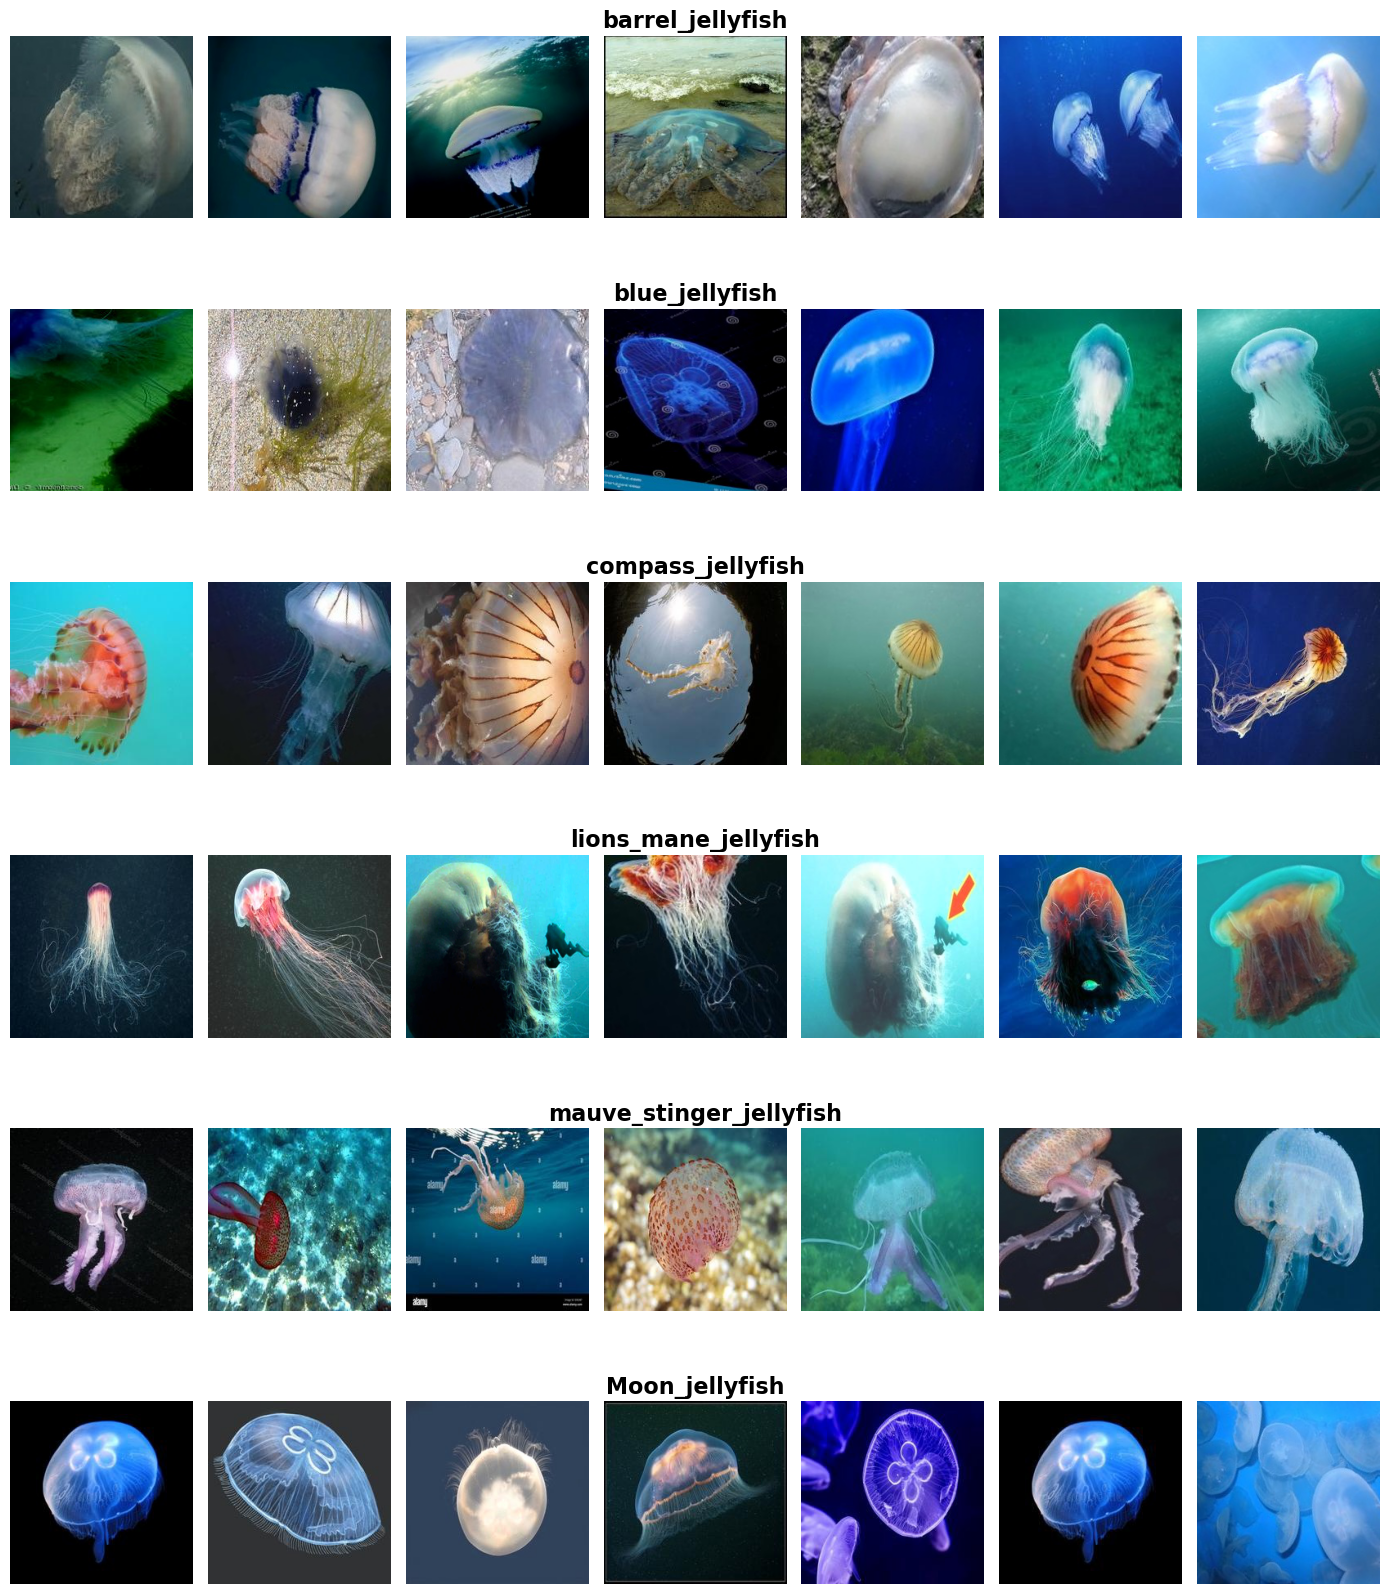

In [118]:
show_sample_images_per_class(jellyfish_dict, samples_per_class=7)


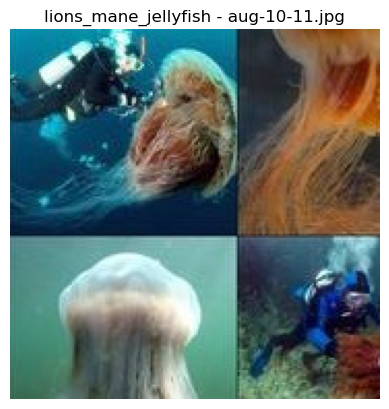

In [119]:
img = Image.open(os.path.join(data_dir, 'lions_mane_jellyfish', 'aug-10-11.jpg')).convert('RGB')

plt.imshow(img)
plt.axis('off')
plt.title("lions_mane_jellyfish - aug-10-11.jpg")
plt.show()

In [120]:
def plot_histograms(class_name, images):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes = axes.ravel()
    axes[0].set_title('Red Histogram')
    axes[1].set_title('Green Histogram')
    axes[2].set_title('Blue Histogram')

    r_values = np.concatenate([img[:, :, 0].ravel() for img in images])
    g_values = np.concatenate([img[:, :, 1].ravel() for img in images])
    b_values = np.concatenate([img[:, :, 2].ravel() for img in images])

    axes[0].hist(r_values, bins=64, color='red')
    axes[1].hist(g_values, bins=64, color='green')
    axes[2].hist(b_values, bins=64, color='blue')
    for ax in axes:
        ax.set_ylim(0, 400000)


    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.suptitle(f"RGB Histograms for category: {class_name}", fontsize=16)
    plt.show()

In [121]:
def plot_gray_histograms(class_name, images):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title(f'Gray Histogram for Category: {class_name}')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylim(0,400000)
    ax.set_ylabel('Frequency')

    all_pixels = np.concatenate([skimage.color.rgb2gray(img).ravel()*255 for img in images])

    ax.hist(all_pixels, bins=64, color='gray')

    plt.tight_layout()

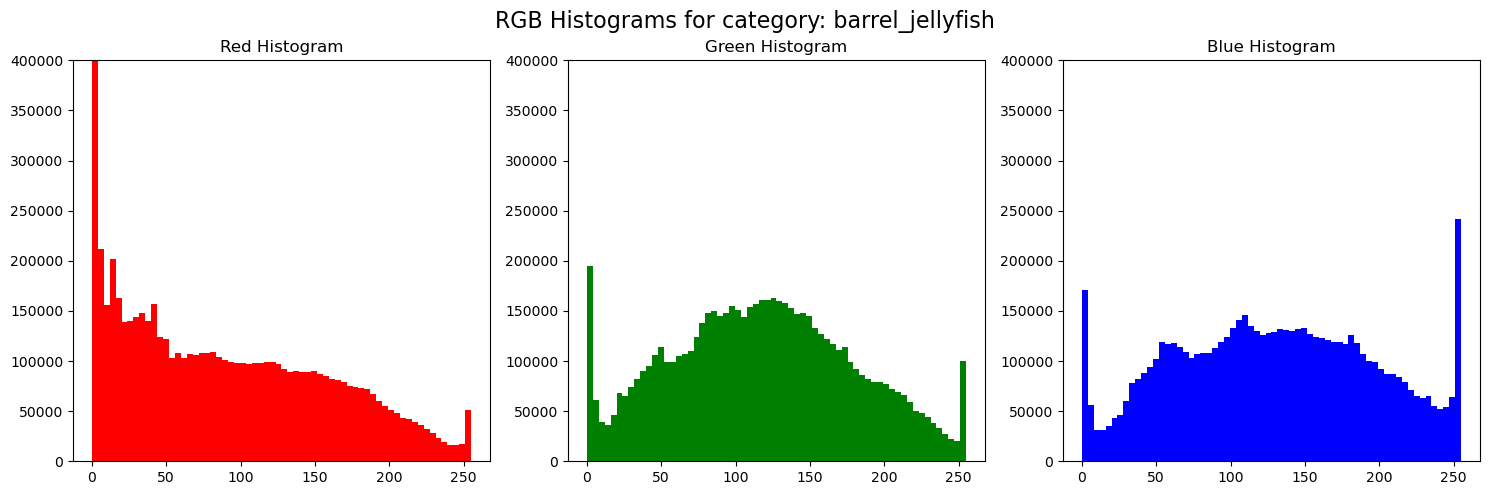

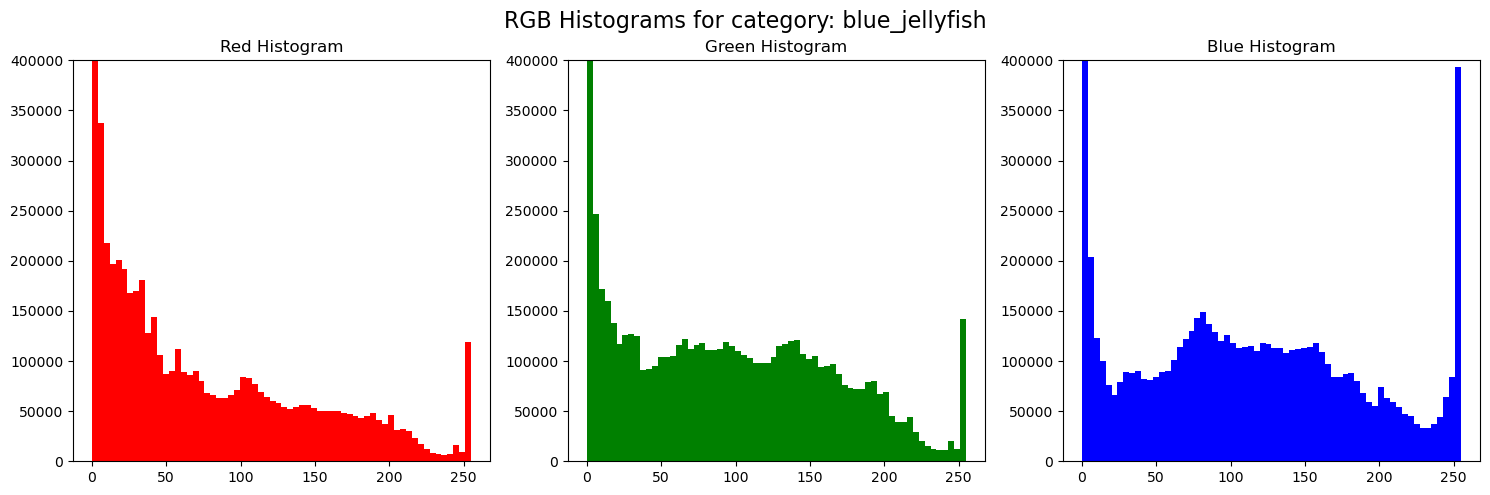

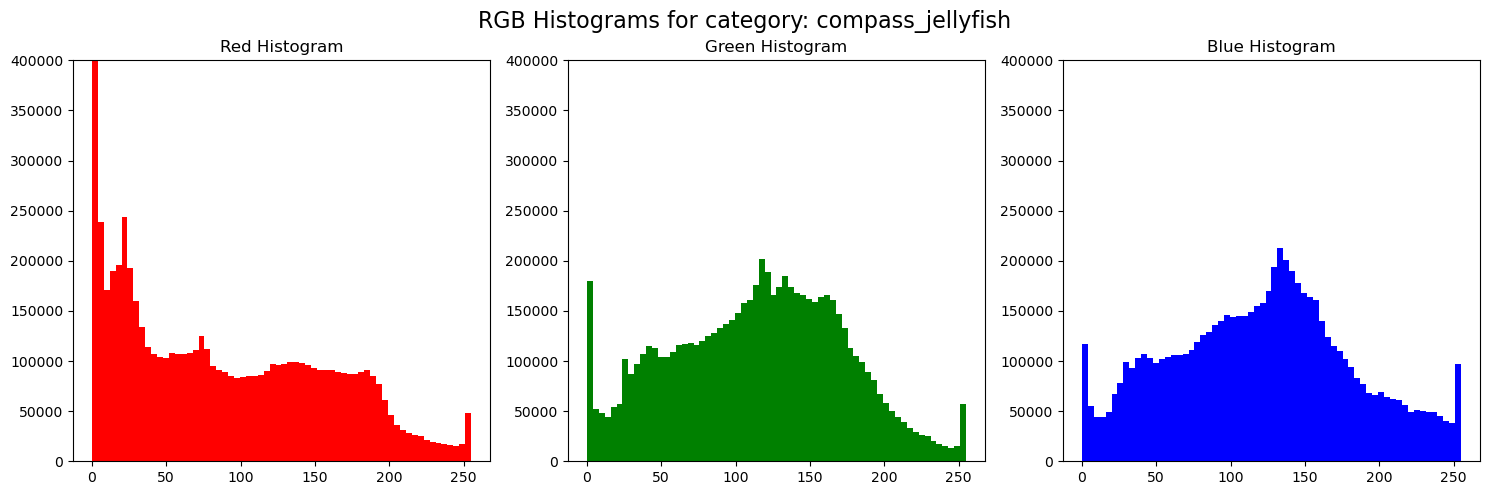

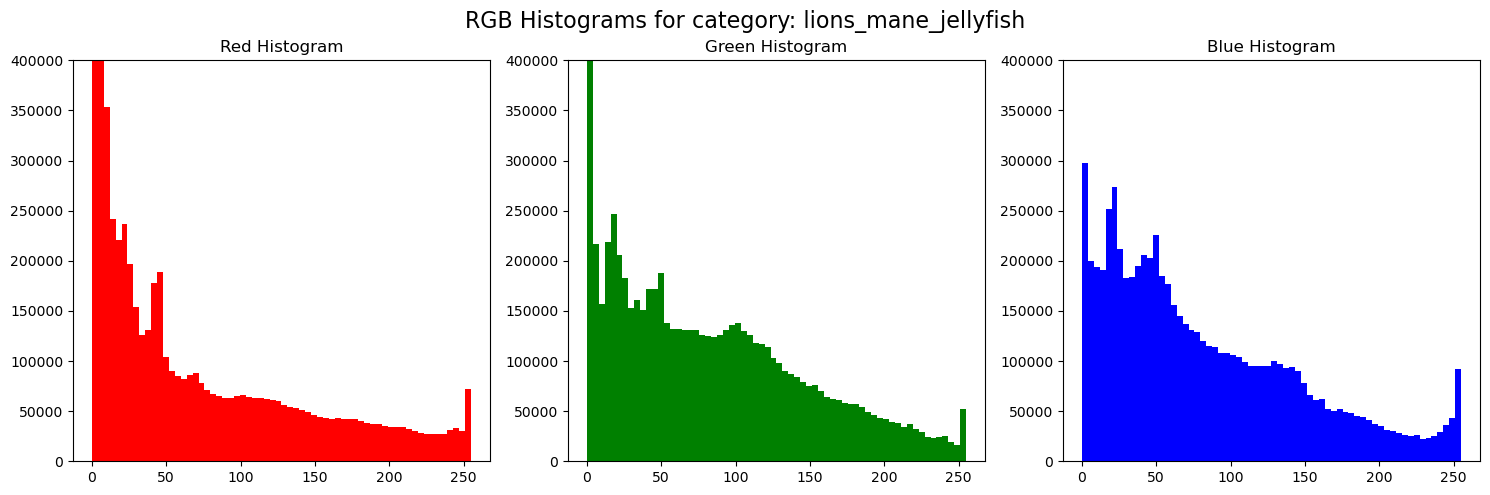

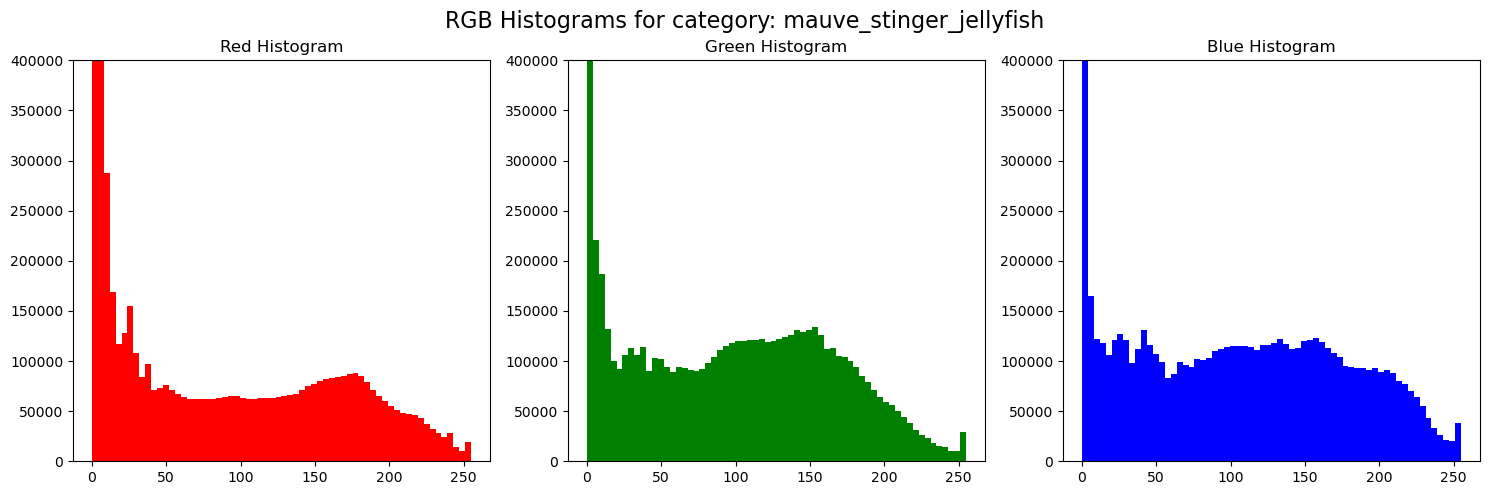

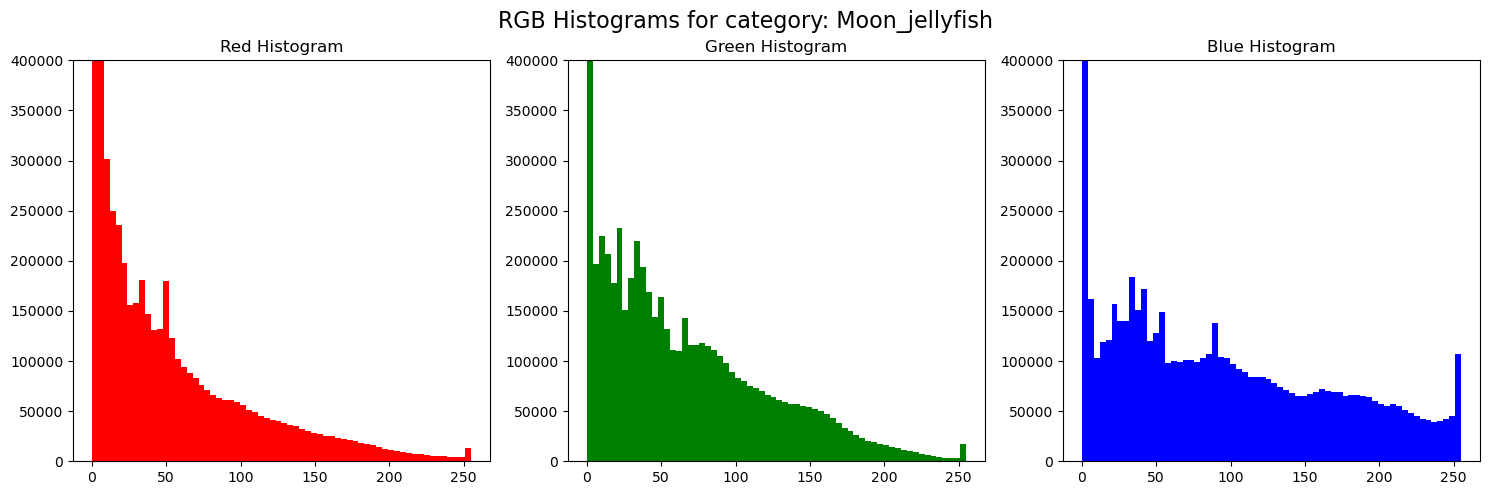

In [122]:
for class_name, images in jellyfish_dict.items():
    plot_histograms(class_name, images)

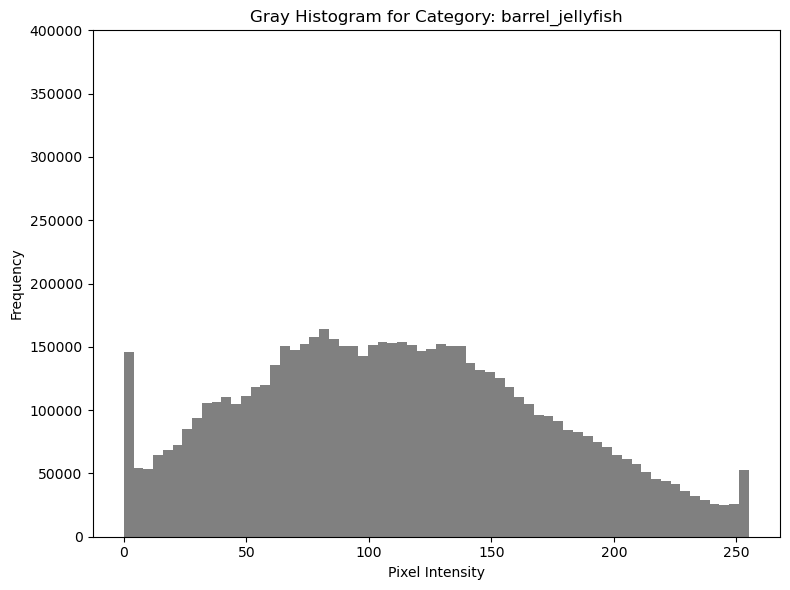

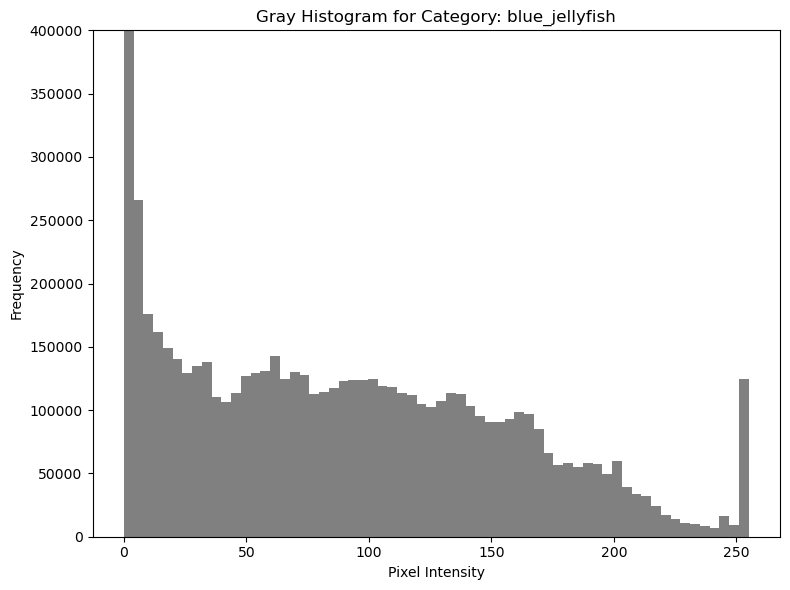

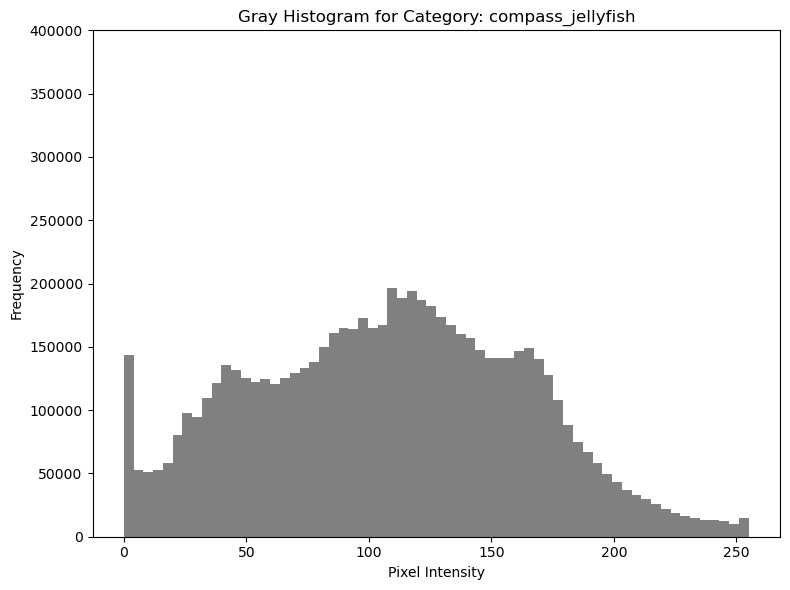

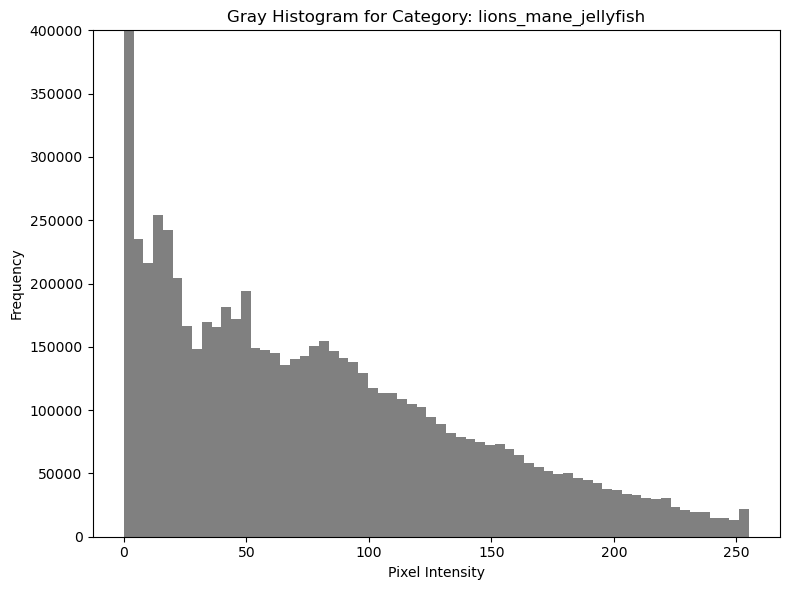

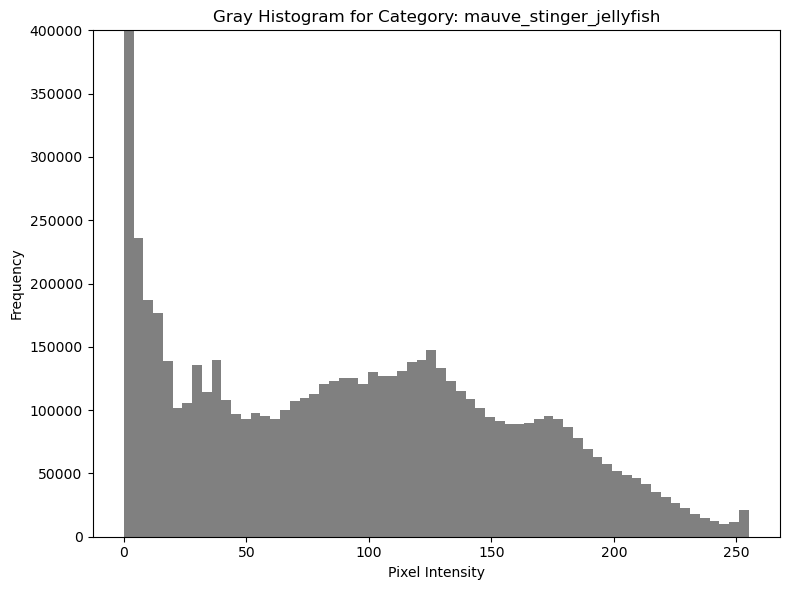

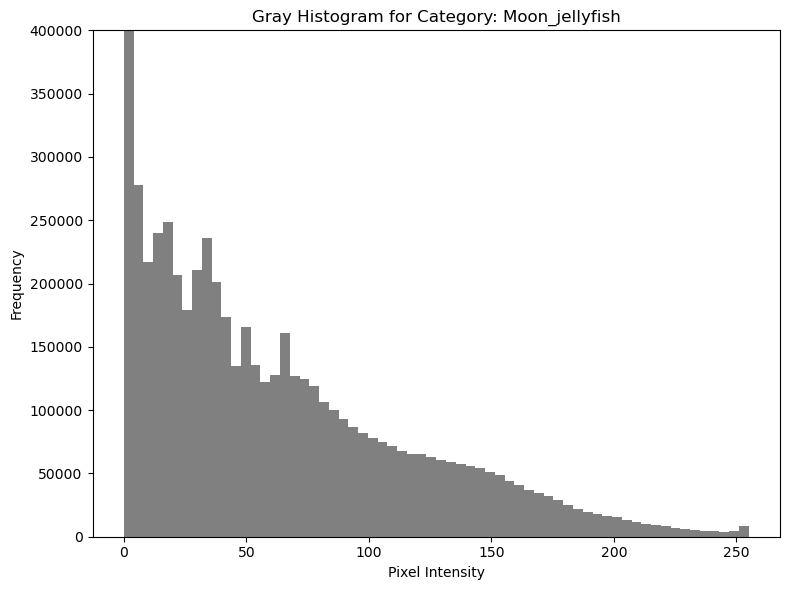

In [123]:
for class_name, images in jellyfish_dict.items():
    plot_gray_histograms(class_name, images)

In [124]:
def plot_mean_rgb_by_class(class_images_dict):
    class_names = list(class_images_dict.keys())
    mean_r = []
    mean_g = []
    mean_b = []

    for images in class_images_dict.values():
        r_values = np.concatenate([img[:, :, 0].ravel() for img in images])
        g_values = np.concatenate([img[:, :, 1].ravel() for img in images])
        b_values = np.concatenate([img[:, :, 2].ravel() for img in images])

        mean_r.append(np.mean(r_values))
        mean_g.append(np.mean(g_values))
        mean_b.append(np.mean(b_values))

    x = np.arange(len(class_names))
    width = 0.25

    plt.figure(figsize=(10, 6))
    plt.bar(x - width, mean_r, width, color='red', label='Red')
    plt.bar(x,         mean_g, width, color='green', label='Green')
    plt.bar(x + width, mean_b, width, color='blue', label='Blue')

    plt.xticks(x, class_names, rotation=45, ha='right')
    plt.ylabel("Średnia wartość kanału (0–255)")
    plt.title("Średnie wartości RGB dla każdej klasy")
    plt.ylim(0, 150)
    plt.legend()
    plt.tight_layout()
    plt.show()

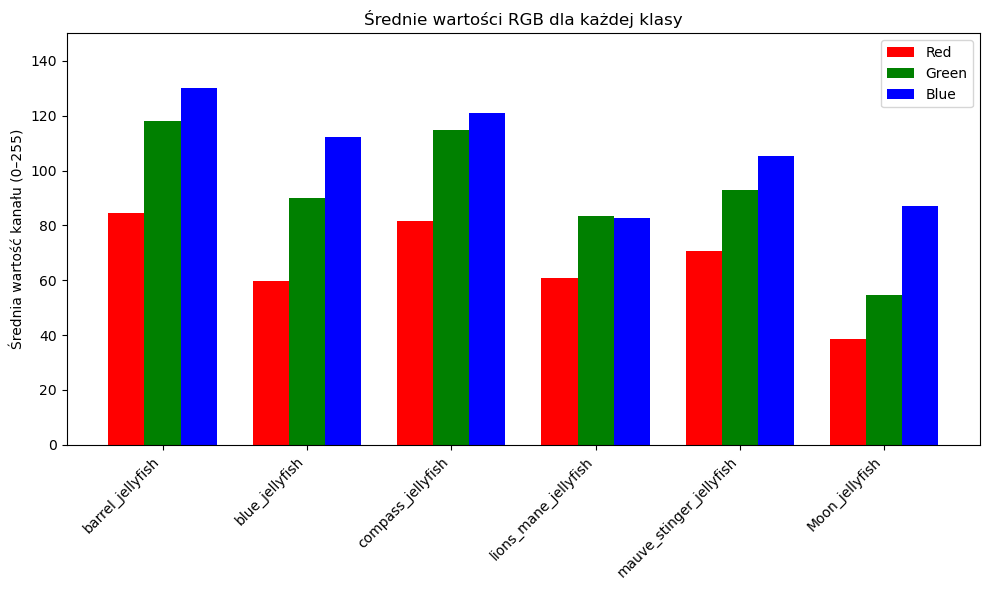

In [125]:
plot_mean_rgb_by_class(jellyfish_dict)